# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as bs
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
#https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
response = browser.html
soup = bs(response, 'html.parser')
soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<meta content="Mark Otto, Jacob Thornton, and Bootstrap contributors" name="author"/>
<meta content="Hugo 0.84.0" name="generator"/>
<title>Mars Temperature Data</title>
<link href="https://getbootstrap.com/docs/5.0/examples/jumbotron/" rel="canonical"/>
<!-- Bootstrap core CSS -->
<link crossorigin="anonymous" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" rel="stylesheet"/>
<style>
    .bd-placeholder-img {
      font-size: 1.125rem;
      text-anchor: middle;
      -webkit-user-select: none;
      -moz-user-select: none;
      user-select: none;
    }

    @media (min-width: 768px) {
      .bd-placeholder-img-lg {
        font-size: 3.5rem;
      }
    }
  </style>
</head>
<body>
<main>
<div class="container py-4">


In [5]:
# Extract all rows of data
table = soup.body.find_all('tr', class_='data-row')
len(table)

1867

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
row_list = []
# Loop through the scraped data to create a list of rows
for row in table:
    td_list = []
    
    for td in row:
        td_list.append(td.text)
    row_list.append(td_list)
print(row_list[0:3])        
    

[['\n', '2', '\n', '2012-08-16', '\n', '10', '\n', '155', '\n', '6', '\n', '-75.0', '\n', '739.0', '\n'], ['\n', '13', '\n', '2012-08-17', '\n', '11', '\n', '156', '\n', '6', '\n', '-76.0', '\n', '740.0', '\n'], ['\n', '24', '\n', '2012-08-18', '\n', '12', '\n', '156', '\n', '6', '\n', '-76.0', '\n', '741.0', '\n']]


In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = []
cols = soup.body.find('tr')
for name in cols:
    column_names.append(name.text)
column_names

['\n',
 'id',
 '\n',
 'terrestrial_date',
 '\n',
 'sol',
 '\n',
 'ls',
 '\n',
 'month',
 '\n',
 'min_temp',
 '\n',
 'pressure',
 '\n']

In [8]:
# Confirm DataFrame was created successfully
df = pd.DataFrame(row_list)
df.columns = (column_names)
df
weather_df = df[['id','terrestrial_date','sol','ls','month','min_temp','pressure']]
weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
df2 = weather_df.astype({'id':'object','terrestrial_date':'datetime64[ns]', 'sol':'int64', 
                              'ls':'int64', 'month':'int64', 'min_temp':'float64', 'pressure':'float64'})


In [11]:
# Confirm type changes were successful by examining data types again
df2.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
print(df2['month'].unique())
months = df2['month'].unique().max()
print(months)

[ 6  7  8  9 10 11 12  1  2  3  4  5]
12


1. There are 12 months on Mars

In [13]:
# 2. How many Martian days' worth of data are there?
print('Sol min:' + str(df2['sol'].min()))
print('Sol max:' + str(df2['sol'].max()))
print('Count of unique Martian days: '+ str(df2['sol'].nunique()))

Sol min:10
Sol max:1977
Count of unique Martian days: 1867


2. There are 1867 Martian days' worth of data.

In [14]:
# 3. What is the average low temperature by month?
gr_month_df = df2.groupby('month').mean()
print('Average low temperature by month:')
print(gr_month_df['min_temp'])

Average low temperature by month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


Text(0, 0.5, 'Average minimum temperature')

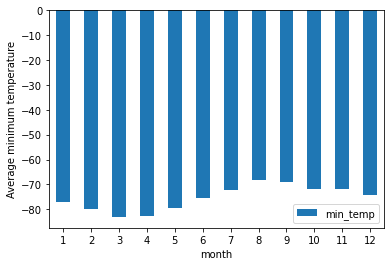

In [15]:
# Plot the average temperature by month
ax = gr_month_df.plot(kind='bar', y='min_temp', rot=0)
plt.ylabel('Average minimum temperature')

In [16]:
# Identify the coldest and hottest months in Curiosity's location
# Get min and max temperatures from grouped df. Store in variables.
coldest_month_temp = gr_month_df['min_temp'].min()
hottest_month_temp = gr_month_df['min_temp'].max()

# Sort grouped df by 'min_temp' column values. Reset index to move 'month' to a column.
sorted_gr = gr_month_df.sort_values('min_temp')
sorted_gr = sorted_gr.reset_index()

# Extract coldest and hottest month values using iloc to target 'month' in first and last rows of sorted df. Store in variables.
coldest_month = sorted_gr.iloc[0,0]
hottest_month = sorted_gr.iloc[11,0]

print('Coldest month: '+ str(coldest_month) + ', with average minimum temperature of '+ str(coldest_month_temp)+'.')
print('Hottest month: '+ str(hottest_month) + ', with average minimum temperature of '+ str(hottest_month_temp)+'.')

Coldest month: 3, with average minimum temperature of -83.30729166666667.
Hottest month: 8, with average minimum temperature of -68.38297872340425.


3. The coldest month on Mars is month 3. The hottest month on Mars is month 8.

In [17]:
# 4. Average pressure by Martian month
average_pressure = gr_month_df['pressure']
print('Average pressure by Martian month:')
average_pressure

Average pressure by Martian month:


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

Text(0, 0.5, 'Average atmospheric pressure')

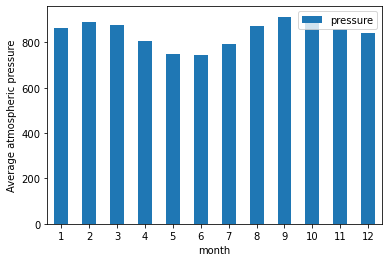

In [18]:
# Plot the average pressure by month
ax2 = gr_month_df.plot(kind='bar', y='pressure', rot=0)
plt.ylabel('Average atmospheric pressure')


In [19]:
# sort df by pressure values
sorted_pr = gr_month_df.sort_values('pressure')
sorted_pr = sorted_pr.reset_index()
sorted_pr

,month,sol,ls,min_temp,pressure
0,6,750.829932,164.897959,-75.299320,745.054422
1,5,1182.691275,132.885906,-79.308725,748.557047
2,7,715.105634,194.894366,-72.281690,795.105634
3,4,1244.500000,104.365979,-82.747423,806.329897
4,12,990.951807,344.692771,-74.451807,842.156627
5,11,947.224638,314.536232,-71.985507,857.014493
6,1,1077.574713,15.281609,-77.160920,862.488506
7,8,795.333333,224.347518,-68.382979,873.829787
8,3,1204.406250,75.010417,-83.307292,877.322917
9,10,1034.669643,286.330357,-71.982143,887.312500


In [20]:
# Use iloc to locate low & high pressure values and store as variables
low_pr_month = sorted_pr.iloc[0,0]
low_pr_value = sorted_pr.iloc[0,4]
high_pr_month = sorted_pr.iloc[11,0]
high_pr_value = sorted_pr.iloc[11,4]
print('Lowest atmospheric pressure month: '+ str(low_pr_month) + ', with average atmospheric pressure of '+ str(low_pr_value)+'.')
print('Highest atmospheric pressure month: '+ str(high_pr_month) + ', with average atmospheric pressure of '+ str(high_pr_value)+'.')

Lowest atmospheric pressure month: 6, with average atmospheric pressure of 745.0544217687075.
Highest atmospheric pressure month: 9, with average atmospheric pressure of 913.3059701492538.


In [21]:
%matplotlib notebook

In [22]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

<IPython.core.display.Javascript object>


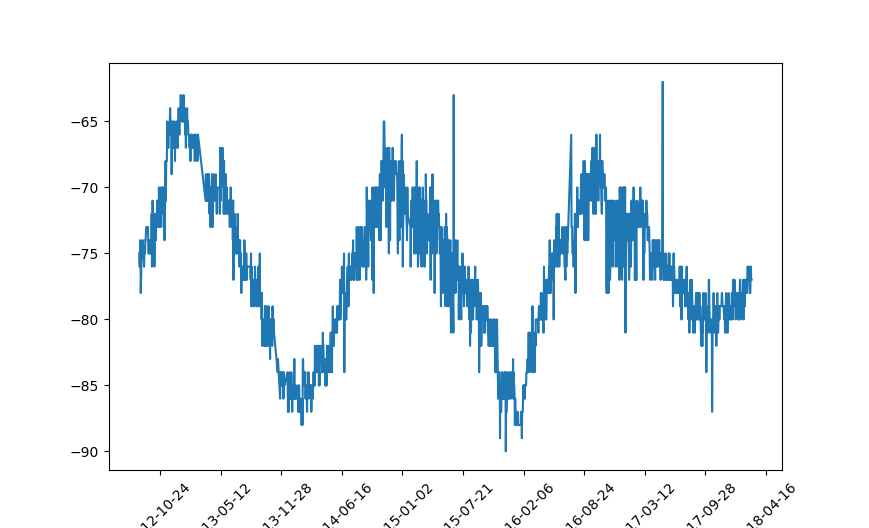

In [60]:
# 5. How many terrestrial (earth) days are there in a Martian year?
fig, ax = plt.subplots()
ax.plot(df2['terrestrial_date'], df2['min_temp'])

ax.xaxis.set_major_locator(MultipleLocator(200))
plt.xticks(rotation = 45)
plt.show()

In [24]:
import datetime

In [25]:
# Analysis of data - using temperature
# 1. A year would be the time bewtween temperature peaks with a trough between.
# 2. There are three outliers which would make calculating year based on minimum and maximum temperatures \
# difficult (2015-06-14, 2016-07-08, 2017-05-05)
# 3. I have estimated by using matplotlib magic notebook and saving xy coordinates for max and min temperatures.
# peak temperatures are 'midsummer', trough temperatures are 'midwinter'. There are 3 dates for each, saved in lists ms and mw.

# date values from peaks & troughs of plot above, saved in screenshots.
_ms = ['2013-01-03', '2014-11-02', '2016-10-10']

format = '%Y-%m-%d'
# empty lists to store datetime output
ms = []

print('Midsummer dates:')

for i in _ms:
    
    # convert from string format to datetime format
    # and get the date
    value = datetime.datetime.strptime(i, format).date()
    print(datetime.datetime.strptime(i, format).date())
    ms.append(value)

Midsummer dates:
2013-01-03
2014-11-02
2016-10-10


In [26]:
_mw = ['2014-02-06', '2015-12-15', '2017-10-22']
mw = []
print('Midwinter dates:')
for i in _mw:
    
    # convert from string format to datetime format
    # and get the date
    value = datetime.datetime.strptime(i, format).date()
    print(datetime.datetime.strptime(i, format).date())
    mw.append(value)

Midwinter dates:
2014-02-06
2015-12-15
2017-10-22


In [27]:
year1 = ms[1]-ms[0]
year2 = mw[1]-mw[0]
year3 = ms[2]-ms[1]
year4 = mw[2]-mw[1]
print('Year 1: ' +str(year1))
print('Year 2: ' +str(year2))
print('Year 3: ' +str(year3))
print('Year 4: ' +str(year4))
year_se = pd.Series([year1, year2, year3, year4])
est_year = year_se.mean()
print('Estimated year length: ' +str(est_year))

Year 1: 668 days, 0:00:00
Year 2: 677 days, 0:00:00
Year 3: 708 days, 0:00:00
Year 4: 677 days, 0:00:00
Estimated year length: 682 days 12:00:00


There are approximately 682 terrestrial days in a Martian year.

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [28]:
# Write the data to a CSV
df2.to_csv("mars_weather_df.csv")

In [29]:
browser.quit()